# Introduction
In this notebook i will be creating a model to predict a customers purchase behaviour. I will be using the customer data to create a classification model that predicts a customer's likelihood to buy a bike. The data includes demographic features and purchase history of the customers. The Bike company is interested in discovering any apparent relationships between demographic features known about customers and whether they purchase a bike.
The notebook will be presented as follow:
Data Preprocessing & Cleansing
Exploratory data analysis & Visualisation
Feature Engineering
Data Modeling
Evaluting the Model
Conclusion

# Goal
The goal is to predict the customers' purchase behaviour. For each customer, I will predict a 0 or 1 for the BikeBuyer variable. (1 means the customer will buy a bike, 0 means a customer will not)

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
#ignore warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn()
%matplotlib inline

# Data Preprocessing & Cleansing
The next step is to preprocess these dataset in order ta make it useful for visualization and training session.
First of all we read our data set into a data frame, so that we can manipulate it easily.

In [2]:
# we read out dataset in also specifying that the "Customer Id is the index"
data = pd.read_csv('train_technidus_clf.csv')

In [3]:
#to view the first five rows
data.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,14540.0,NaN,Randy,NaN,Lin,NaN,8848 Auburn,NaN,London,England,...,Manual,M,M,1.0,0.0,0.0,1.0,35455.0,70.0,1
1,18054.0,NaN,Jake,NaN,Zeng,NaN,4058 First Ave,NaN,Cliffside,British Columbia,...,Professional,M,S,0.0,1.0,0.0,0.0,43980.0,69.0,0
2,16955.0,NaN,Nathaniel,NaN,Bradley,NaN,3679 Diablo View Road,NaN,Metchosin,British Columbia,...,Skilled Manual,M,M,1.0,0.0,2.0,2.0,57713.0,102.0,0
3,11626.0,NaN,Destiny,NaN,Rogers,NaN,3588 Vancouver Way,NaN,San Francisco,California,...,Skilled Manual,F,M,1.0,0.0,0.0,1.0,53438.0,49.0,0
4,18651.0,NaN,Isaiah,A,Mitchell,NaN,5014 Steele Drive,NaN,Lynnwood,Washington,...,Clerical,M,M,0.0,2.0,0.0,1.0,55291.0,73.0,0


In [4]:
#to view the last five rows
data.tail()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
7681,19195.0,NaN,Darren,A,Romero,NaN,5038 Kenwal Rd,NaN,Birmingham,England,...,Clerical,M,S,1.0,0.0,2.0,2.0,52622.0,87.0,1
7682,22174.0,NaN,Micah,NaN,Lu,NaN,5710 Ida Drive,NaN,Perth,South Australia,...,Skilled Manual,M,M,1.0,2.0,0.0,3.0,50085.0,73.0,0
7683,17665.0,NaN,Zachary,NaN,Jenkins,NaN,8922 Big Canyon Road,NaN,Oregon City,Oregon,...,Clerical,M,M,0.0,2.0,0.0,2.0,50985.0,69.0,0
7684,12148.0,NaN,Gabrielle,A,Morris,NaN,8553 R St.,NaN,Salem,Oregon,...,Professional,F,S,1.0,0.0,2.0,5.0,102378.0,72.0,1
7685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3814


The last row contains missing values, most likely an error from the data collection. Due to its irrelevance, I will need to remove the last row.

In [5]:
data.drop(data.tail(1).index,inplace=True)

In [6]:
# to check for missing values
data.isnull().sum()

CustomerID                 0
Title                   7644
FirstName                  0
MiddleName              3228
LastName                   0
Suffix                  7684
AddressLine1               0
AddressLine2            7550
City                       0
StateProvinceName          0
CountryRegionName          0
PostalCode                 0
PhoneNumber                0
BirthDate                  0
Education                  0
Occupation                 0
Gender                     0
MaritalStatus              0
HomeOwnerFlag              0
NumberCarsOwned            0
NumberChildrenAtHome       0
TotalChildren              0
YearlyIncome               0
AveMonthSpend              0
BikeBuyer                  0
dtype: int64

We can see that we have been given birthdates of our customers instead of their age, We will need to convert the birthdate which is stored as a string object into age.

In [7]:
data['BirthDate'] = pd.to_datetime(data['BirthDate'])  #to convert the Birthdate data type
now = datetime.now()    
data['Age'] = now - data['BirthDate'] 
data['Age'] = data['Age'] /  np.timedelta64(1, 'Y') 

It's always a good practise to have a good understanding of your data before doing anything. You can start by viewing the columns, that should give you an idea of the features you have also to check for irrelevant features.

In [8]:
#to check for all the columns in our data set
data.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer', 'Age'],
      dtype='object')

Now we can see that for some customers, we dont have information on their Title, Middlename, Suffix and AddressLine 2 as indicated by the number of null values. These missing information are not too worrisome as they don't seem to be strong indicators on whether a customer will purchase a bike or not. However, lets try to understand why they are missing. So for Title, Suffix and Middle name, it is possible that when these were filled (assuming these information on customers were collected via self-form filling) the users didnt fill them or that they dont have middle names or suffixes so it did not apply to them. For address line 2, it is usually unecessary to fill unless you live in an apartment or condominium, where you'll need to fill in your aprtment number of floor number. Most people fill up Adress line 1, which is the case in our dataset and probably implies that not a lot of people in our dataset live in apartments or condos. Hence, we will be dropping these columns and others that are irrelevant to predicting whether a customer will purchase a bike or not. I will also drop the 'BirthDate' column as it has been transformed into the Age feature.

In [9]:
data=data.drop(['Title','CustomerID','FirstName','BirthDate','MiddleName','Suffix','LastName','City','StateProvinceName','AddressLine1', 'AddressLine2','PostalCode','PhoneNumber'], axis=1)

In [10]:
#to confirm our final dataset after preprocessing
data.head()

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,United Kingdom,Bachelors,Manual,M,M,1.0,0.0,0.0,1.0,35455.0,70.0,1,61.517635
1,Canada,Bachelors,Professional,M,S,0.0,1.0,0.0,0.0,43980.0,69.0,0,59.048042
2,Canada,Bachelors,Skilled Manual,M,M,1.0,0.0,2.0,2.0,57713.0,102.0,0,50.182700
3,United States,Graduate Degree,Skilled Manual,F,M,1.0,0.0,0.0,1.0,53438.0,49.0,0,46.360581
4,United States,High School,Clerical,M,M,0.0,2.0,0.0,1.0,55291.0,73.0,0,64.469098


In [11]:
#to check our data types
data.dtypes

CountryRegionName        object
Education                object
Occupation               object
Gender                   object
MaritalStatus            object
HomeOwnerFlag           float64
NumberCarsOwned         float64
NumberChildrenAtHome    float64
TotalChildren           float64
YearlyIncome            float64
AveMonthSpend           float64
BikeBuyer                 int64
Age                     float64
dtype: object

# Exploratory data analysis & Visualisation

In [12]:
#to check the statistical summary of the numerical columns
data.describe()

,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
count,7685.000000,7685.000000,7685.000000,7685.000000,7685.000000,7685.000000,7685.000000,7685.000000
mean,0.696682,1.569031,1.230839,2.151464,82323.659206,76.383995,0.496291,57.271678
std,0.459721,1.177871,1.650189,1.727375,40368.317414,29.367313,0.500019,10.575716
min,0.000000,0.000000,0.000000,0.000000,10063.000000,26.000000,0.000000,38.825861
25%,0.000000,1.000000,0.000000,1.000000,50784.000000,53.000000,0.000000,49.522864
50%,1.000000,2.000000,0.000000,2.000000,82158.000000,71.000000,0.000000,55.844691
75%,1.000000,2.000000,2.000000,4.000000,109389.000000,89.000000,1.000000,63.831166
max,1.000000,4.000000,5.000000,5.000000,193721.000000,176.000000,1.000000,107.881352


I am going to need to seperate numerical columns and categoricals columns for visualisation purpose.

In [13]:
numerical_cols=['YearlyIncome','AveMonthSpend','Age']
categorical_cols=['CountryRegionName','Education','Occupation','Gender','MaritalStatus','HomeOwnerFlag','NumberCarsOwned'
                  ,'NumberChildrenAtHome','TotalChildren','BikeBuyer']

# Bar Plot for Categorical columns

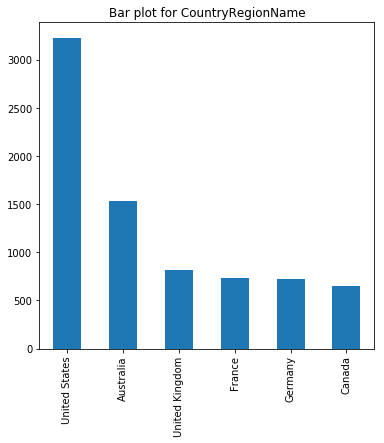

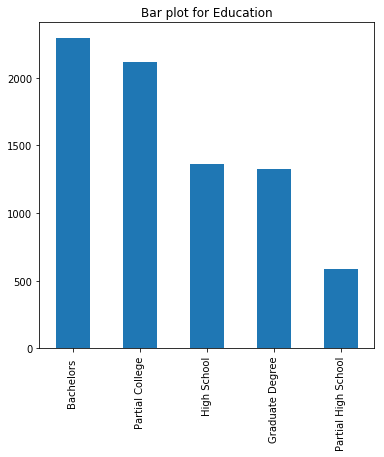

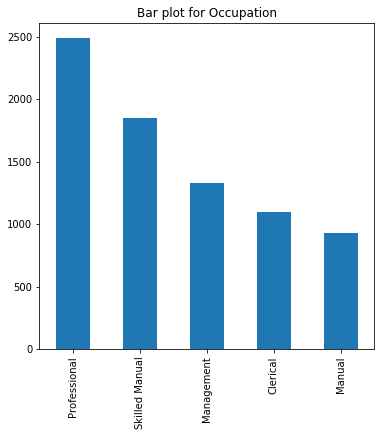

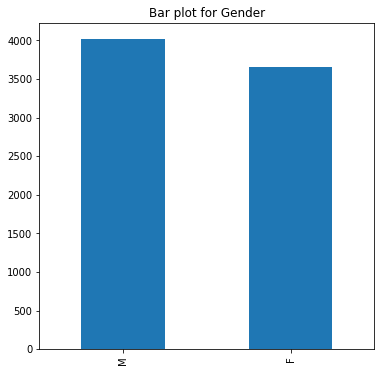

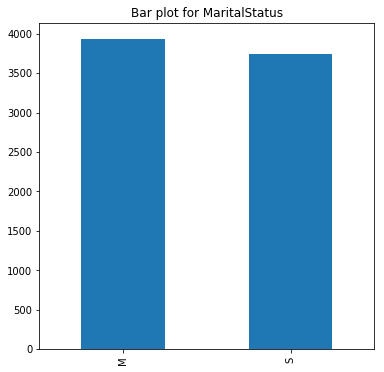

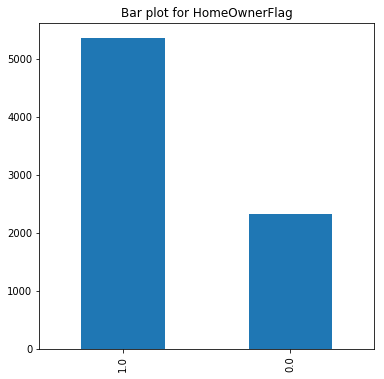

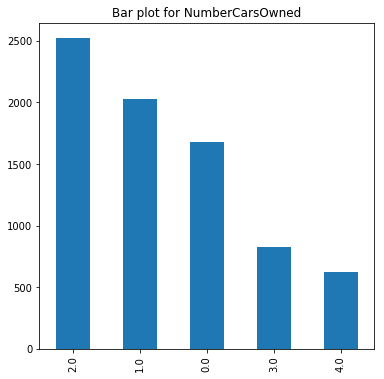

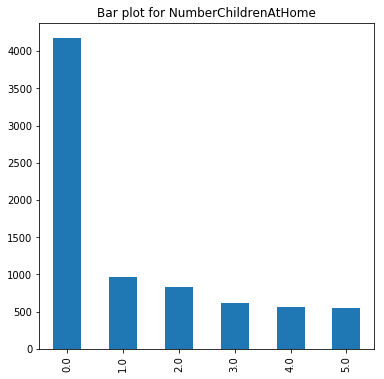

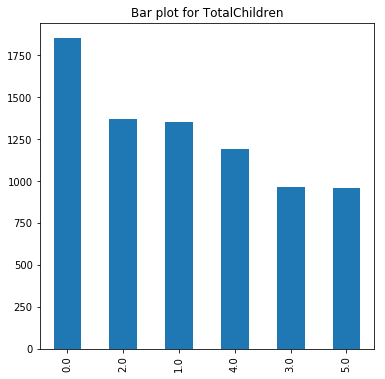

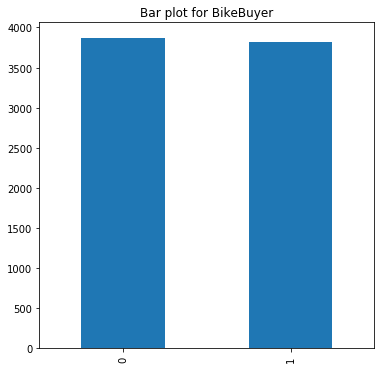

In [14]:
for col in categorical_cols:
    fig = plt.figure(figsize=(6,6)) # this is to define plot area
    ax = fig.gca() # to define axis  
    
    counts = data[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)

# Interpretation
1. Most of the Customers are from United States.
2. We have mostly educated customers with bachelors degree being the most.
3. Most of the customers are professional.
4. We have slightly more men than women.
5. We have more married customers than single.
6. There are slightly more people who have not bought bikes.
7. Most of the customers do not have their children at home.
8. Most of the customers own their houses.

# Plot for Numerical Features

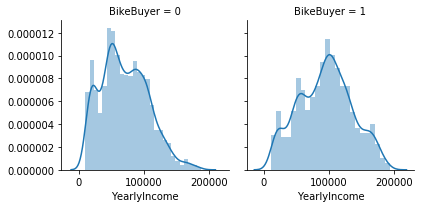

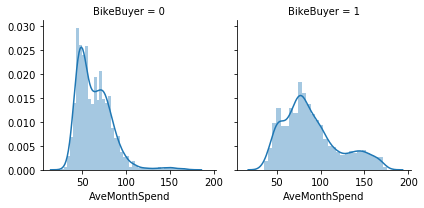

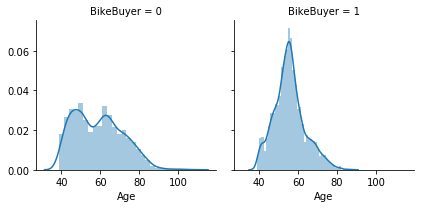

In [15]:
for col in numerical_cols:
    g = sns.FacetGrid(data, col='BikeBuyer')
    g = g.map(sns.distplot, col)

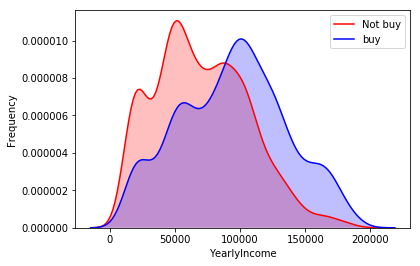

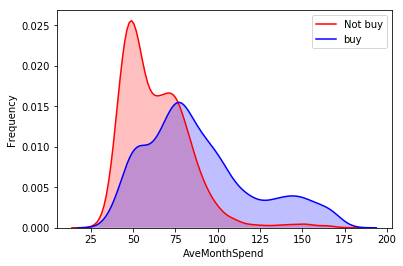

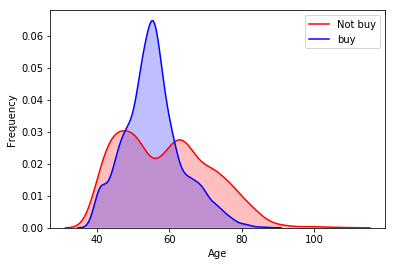

In [16]:
for col in numerical_cols:
    g = sns.kdeplot(data[col][(data["BikeBuyer"] == 0) & (data[col].notnull())], color="Red", shade = True)
    g = sns.kdeplot(data[col][(data["BikeBuyer"] == 1) & (data[col].notnull())], ax =g, color="Blue", shade= True)
    g.set_xlabel(col)
    g.set_ylabel("Frequency")
    g = g.legend(["Not buy","buy"])
    plt.show()

# Plots of Categorical columns against target column

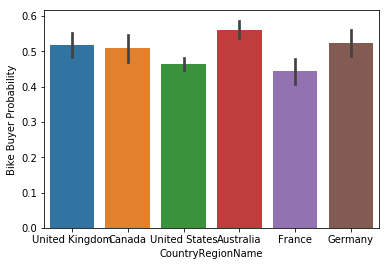

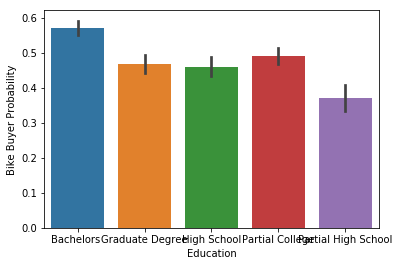

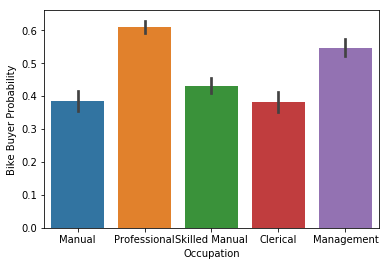

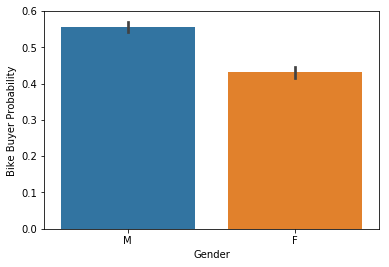

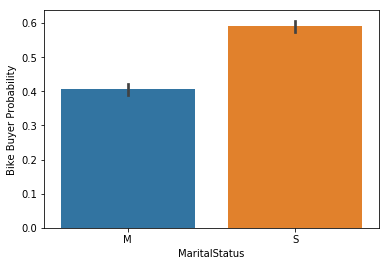

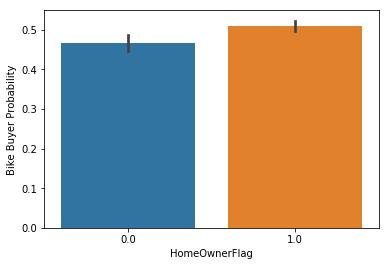

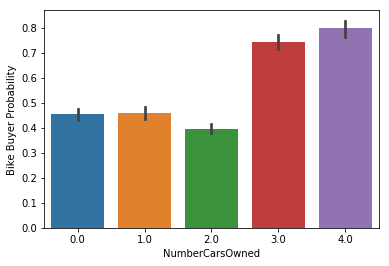

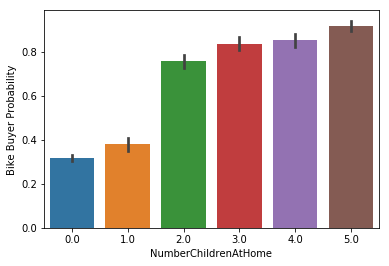

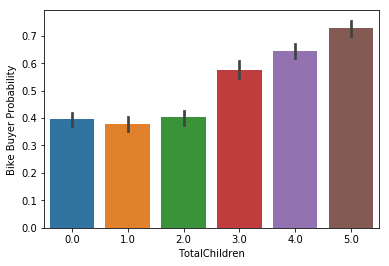

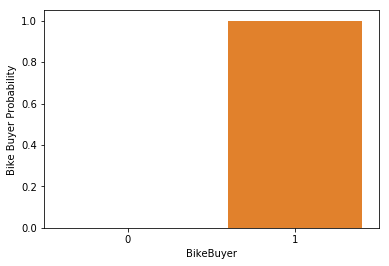

In [17]:
for col in categorical_cols:
    g = sns.barplot(x=col, y="BikeBuyer",data=data)
    g = g.set_ylabel("Bike Buyer Probability")
    plt.show()

# Pair plot of columns

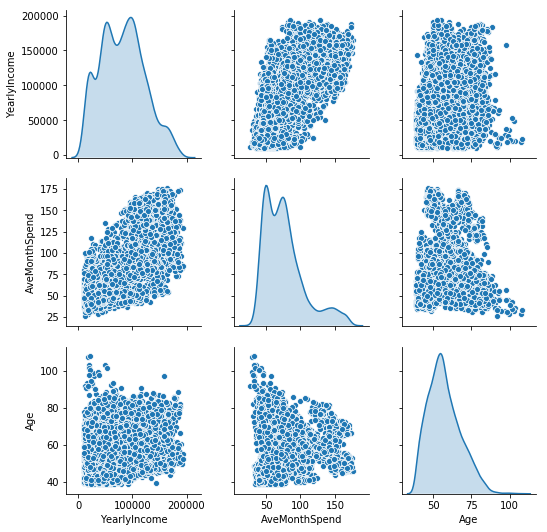

In [18]:
sns.pairplot(data[numerical_cols],diag_kind='kde')

# Correlation Matrix

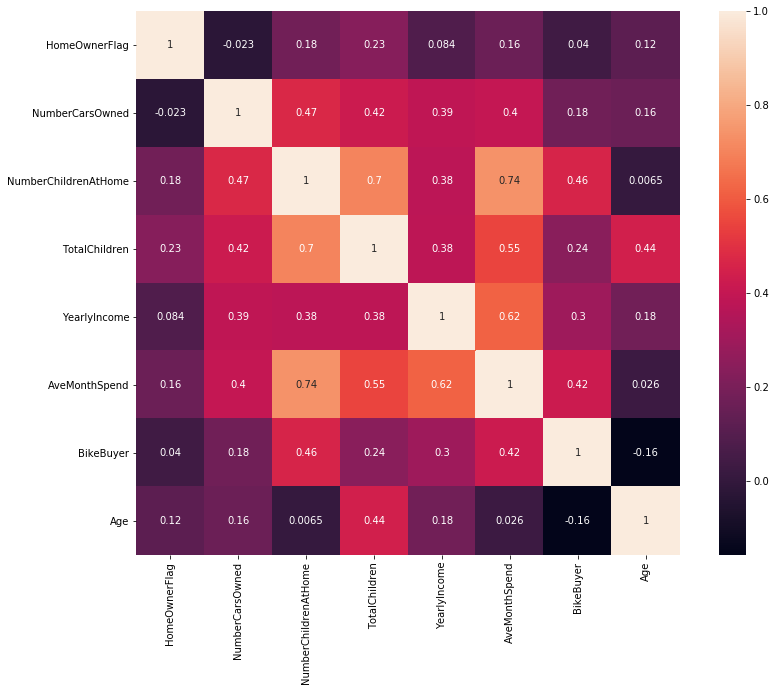

In [19]:
corrmatrix = data.corr()
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(corrmatrix, square=True,annot=True)

# Transforming skewed features
During our EDA, we identified that AveMonthSpend and Age were right skewed, and we proposed to log transform them into a normal distribution.

Text(0.5, 1.0, 'Transformation of Age feature')

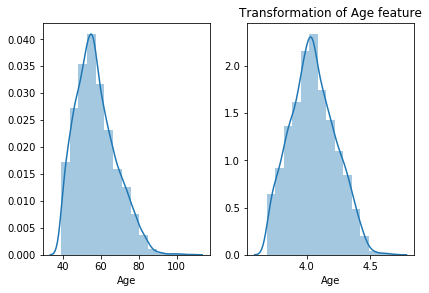

In [20]:
fig, ax = plt.subplots(1,2)
#plot of normal Age on the first axis
sns.distplot(data['Age'], bins=15, ax=ax[0])

#Transform the Age and plot on the second axis
data['Age'] = np.log1p(data['Age'])
sns.distplot(data['Age'], bins=15, ax=ax[1])

plt.tight_layout()
plt.title("Transformation of Age feature")

Text(0.5, 1.0, 'Transformation of AveMonthSpend feature')

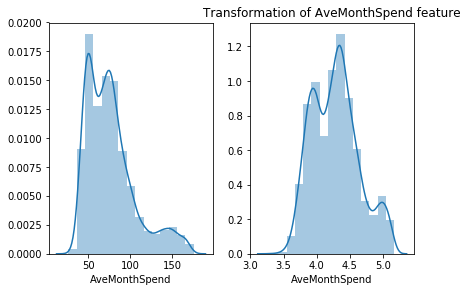

In [21]:
fig, ax = plt.subplots(1,2)
#plot of normal AveMonthspend on the first axis
sns.distplot(data['AveMonthSpend'], bins=15, ax=ax[0])

#Transform the Product_Supermarket_Sales and plot on the second axis
data['AveMonthSpend'] = np.log1p(data['AveMonthSpend'])
sns.distplot(data['AveMonthSpend'], bins=15, ax=ax[1])

plt.tight_layout()
plt.title("Transformation of AveMonthSpend feature")

# Handling categorical features
At the moment we still have categorical features, the aim of this section is to pre process those features in order to make them numerical so that they will fit into our model.
In literature there are two famous kind of categorical variable transformation, the first one is label encoding, and the second one is the one hot encoding, for this use case we will use the one hot position and the reason why I will choose this kind of data labeling is because I will not need any kind of data normalisation later, and also This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

In [22]:
#Encoding of features
for col in categorical_cols:
    print('Value Count for', col)
    print(data[col].value_counts())
    print("---------------------------")

Value Count for CountryRegionName
United States     3226
Australia         1537
United Kingdom     820
France             731
Germany            726
Canada             645
Name: CountryRegionName, dtype: int64
---------------------------
Value Count for Education
Bachelors              2294
Partial College        2117
High School            1361
Graduate Degree        1324
Partial High School     589
Name: Education, dtype: int64
---------------------------
Value Count for Occupation
Professional      2485
Skilled Manual    1845
Management        1330
Clerical          1095
Manual             930
Name: Occupation, dtype: int64
---------------------------
Value Count for Gender
M    4024
F    3661
Name: Gender, dtype: int64
---------------------------
Value Count for MaritalStatus
M    3939
S    3746
Name: MaritalStatus, dtype: int64
---------------------------
Value Count for HomeOwnerFlag
1.0    5354
0.0    2331
Name: HomeOwnerFlag, dtype: int64
---------------------------
Value Count

In [23]:
#save the target value to a new variable
y = data['BikeBuyer']
data.drop(['BikeBuyer'], axis=1, inplace=True)
#one hot encode using pandas dummy function
X = pd.get_dummies(data)
X.head()

,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Age,CountryRegionName_Australia,CountryRegionName_Canada,CountryRegionName_France,...,Education_Partial High School,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S
0,1.0,0.0,0.0,1.0,35455.0,4.262680,4.135449,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,0.0,1.0,0.0,0.0,43980.0,4.248495,4.095145,0,1,0,...,0,0,0,0,1,0,0,1,0,1
2,1.0,0.0,2.0,2.0,57713.0,4.634729,3.935402,0,1,0,...,0,0,0,0,0,1,0,1,1,0
3,1.0,0.0,0.0,1.0,53438.0,3.912023,3.857790,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,0.0,2.0,0.0,1.0,55291.0,4.304065,4.181578,0,0,0,...,0,1,0,0,0,0,0,1,1,0


# Data Splitting
Usually we split our data into three parts : Training , validation and Testing set, but for simplicity we will use only train and test with 20% in test size.

In [37]:
# now we use the train_test_split function already available in sklearn library to split our data set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
print("Training data is", X_train.shape)
print("Training target is", Y_train.shape)
print("test data is", X_test.shape)
print("test target is", Y_test.shape)

Training data is (6148, 27)
Training target is (6148,)
test data is (1537, 27)
test target is (1537,)


# Perform Feature Normalization/Scaling.

In [26]:
from sklearn.preprocessing import RobustScaler, StandardScaler #Import scaler
scaler = RobustScaler() #create an object from RobustScaler

scaler.fit(X_train) #Fit to the train data only!

#Perform the transformation on train and test data
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

X_train[:5, :5] #Preview the first five rows and columns of train data

array([[-1.        ,  0.        ,  0.        ,  0.66666667, -1.05219368],
       [ 0.        , -1.        ,  0.        , -0.33333333, -0.27261405],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.17439835],
       [ 0.        ,  1.        ,  0.5       ,  0.66666667,  0.60062744],
       [ 0.        , -1.        ,  1.5       ,  0.33333333, -0.3171595 ]])

# Modelling
Now that I've have successfully done the hard part-data cleaning and wrangling-of every data science project, I will move on to the part modelling!

Modelling in machine learning is an iterative phase where a data scientist continually train and test machine learning models to discover the best and high performing one for the give task.

Basically, the scope is to strive for higher performing models, but also it is wiser and better to go for simpler models that perform almost as well as complex models.

I will do some modelling. I'll start with a simple model. It is always good to start with a simple base model because you need a base line to measure performance against.

This data set is small, hence, I'll create a cross validation function and use the mean absolute error metric. This function helps measure our models true performance.

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score


# def get_mae(pred, target):
#   return mean_absolute_error(true, pred)

def cross_validate(model, nfolds, feats, targets):
    score = -1 * (cross_val_score(model, feats, targets, cv=nfolds, scoring='accuracy'))
    return np.mean(score)

# Decision Tree
I am going to be starting with a simple DecisionTree Classifier, cross validate it and print its score.
The decision tree contains many hyperparameter, but the most important ones we can quickly tune are:
max_depth & min_samples_leaf.

In [28]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=2)
print("Accuracy Score: ", cross_validate(decision_tree, 10, X_train, Y_train))

Accuracy Score:  -0.7712991165900915


In [39]:
decision_tree.fit(X_train, Y_train)
predicted=decision_tree.predict(X_test)
A = Y_test.values.reshape(-1, 1)
B = predicted.reshape(-1, 1)

# K-Nearest Neighbor
Next, we try another simple but efficient algorithm called k-nearest neigbor.
The KNN contains a few hyperparameter. The most important one to tune is: n_neighbors. This is the number of neighbors to use when voting. The higher the number, the more accurate it gets (sometimes though) but at an expense of speed.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=40)
print("Accuracy Score: ", cross_validate(knn_model, 10, X_train, Y_train))


Accuracy Score:  -0.7610597041130528


# Bagging Algorithms
Looking at the Accuracy score of our simple models, we can deduce that the decision tree is the best so far. This will be our base line model. Any model that performs better becomes the next base line to beat.

It's imperative to now move from simple to advanced models. Many high performing machine learning models-both in data science competitions and real world-are usually based on ensembles. Ensembling is a method that uses multiple learning algorithms to obtain better predictive performance than could be obtained by any of the single learning algorithm.

# Randomforest
The Random forest algorithm is one of the most popular and effective implementation of bagging, that builds multiple trees from a bootstrap sample. It has high predictive power and works very well out of box. Random Forest contains many hyperparameter, but the most important ones to tune are as follows:

n_estimators: This is the number of decision trees to be created. Basically, a higher number of trees will result in a better model but at a cost of higher training time.

max_depths: This is the maximum depth of the individual trees. Higher number result in simpler trees and hence simpler random forest ensemble. 

max_features: This defines the maximum number of features that is allowed for splitting.

min_samples_split: This is the minimum number of samples required in a leaf node before a splitting.

In [30]:
from sklearn.ensemble import RandomForestClassifier

randomf_model = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=2)
print("Accuracy score: ", cross_validate(randomf_model, 10, X_train, Y_train))

Accuracy score:  -0.7748879891195376


# Extra Tress
The Extra Tree algorithm is another popular implementation of bagging, it is actually similar to the random forest, but builds its base trees differently and is generally faster. It also has high predictive power sometimes outperforming Random Forest. The most important parameters to tune are the same as RandomForest

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
extratree_model = ExtraTreesClassifier(n_estimators=50, max_depth=7, random_state=1)
print("Accuracy Score: ", cross_validate(extratree_model, 10, X_train, Y_train))

Accuracy Score:  -0.7610602294609604


# Bagging Classifier
The Bagging Classifier enables you to create bagging ensembles from any chosen model. I.e you can create bagging ensembles from single models like Linear regression or even ensembles like Random Forest or Extra Trees. The important hyperparameter to tune here are:
base_estimator: This is the estimator to use in performing bagging. The bagging meta-estimator builds multiple models from the specified base estimator. 

n_estimators: This is the number of base estimator to be created. Of course, a higher number of estimators will result in a better model but also at a cost of higher training time.

max_samples: This specifies the maximum number of samples to train each base estimator on.

max_features: This is the maximum number of features to draw from the data set when training each base estimator

In [32]:
from sklearn.ensemble import BaggingClassifier

bgg_model = BaggingClassifier(randomf_model, n_estimators=20, random_state=2)
print("Accuracy score: ", cross_validate(bgg_model, 10, X_train, Y_train))

Accuracy score:  -0.7768360384881399


# Boosting Algorithms
Evidently, from the error metrics, our next best model is the baggingClassifier, which is based on the Random forest classifier. This becomes our new baseline model. Next, I'll try some boosting algorithms.

Boosting is another popular and effective ensembling technique. In Boosting, multiple models are trained sequentially. The goal is to train models that do better than their predecessors. This means we have to take into account the areas where the previous models performed poorly and improve on those area.



# Gradient Boosting
I will start with the popular boosting algorithm, Gradient Boosting. The important hyperparameter to tune here are:

n_estimators: This is the number of base estimators to use. A higher value normally gives better performance.

max_depth: This specifies the depth of the base estimators.

min_samples_splits: This specifies the minimum number of samples required to split an internal node.

max_features: The maximum number of features to draw from the data set when training each base estimator

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=150, max_depth=3, max_features='sqrt', min_samples_split=4, random_state=2)
print("Accuracy Score: ", cross_validate(gb_model, 10, X_train, Y_train))

Accuracy Score:  -0.7730951366368861


# XGBoost
XGBoost is one of the most important machine learning algorithm out there. XGBoost is efficient, fast and works well out of the box. The important hyperparameter to tune here are as follows:
eta: Just a different name for learning rate. It helps in model weight update.

min_child_weight: This specifies the minimum sum of weights of all features required in a child node. It is mostly used to control overfitting.

max_depth: This is used to define the maximum depth of each tree node. Higher depth will allow the model to be more complex and vice versa.

max_leaf_nodes: This specifies the maximum number of leaves in a tree.

Gamma: The Gamma value specifies the minimum loss reduction required to make a split. A node is split only when the resulting split gives a positive reduction in the loss function. The values can vary depending on the loss function and should be tuned.

Subsample: Specifies the fraction of features to be randomly selected for each tree. Lower values make the algorithm more simple and prevent overfitting.

In [34]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=50, max_depth=3, subsample=0.8, random_state=2)
print("Accuracy Score: ", cross_validate(xgb_model, 10, X_train, Y_train))

Accuracy Score:  -0.771470177951071


# Lightgbm
LightGBM is a boosting algorithm from Microsoft. It is one of the fastest boosting algorithm out there; efficient out-of-the-box and currently the go-to when it comes to large structured data. The important hyperparameter to tune here are:
num_iterations: This specifies the number of boosting iterations to be performed.

num_leaves : Specifies the number of leaves to be formed in a tree. Note: In Light GBM, since splitting takes place leaf-wise rather than depth-wise, num_leaves must be smaller than 2^(max_depth), otherwise, it may lead to overfitting.

min_data_in_leaf : It is one of the most important parameters in dealing with overfitting. 

max_depth: Specifies the maximum depth to which a tree can grow. A very high value for this parameter can cause overfitting.

bagging_fraction: It is used to specify the fraction of data to be used for each iteration. This parameter is generally used to speed up the training.

In [35]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(n_estimators=400, max_depth=2, bagging_fraction=0.9, random_state=2)
print("Accuracy Sccore: ", cross_validate(lgbm_model, 10, X_train, Y_train))

Accuracy Sccore:  -0.7763498199716123


# CatBoost
Catboost is a recent boosting algorithm. It is fast, efficient. Its best features is the way it handles categorical features efficiently. CatBoost can automatically deal with categorical variables and does not require extensive data preprocessing like other machine learning algorithms. The important hyperparameter to tune here are as follows:

loss_function: Specifies the metric to be used for training.

Iterations: The maximum number of trees that can be built.

learning_rate: Specifies the learning rate which is used for reducing the gradient step.

depth: Specifies the depth of the trees to be created.

In [36]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(iterations=200,learning_rate=0.1,depth=4)
print("Accuracy Sccore: ", cross_validate(cat_model, 10, X_train, Y_train))

0:	learn: 0.6532716	total: 154ms	remaining: 30.7s
1:	learn: 0.6195611	total: 207ms	remaining: 20.5s
2:	learn: 0.5915279	total: 259ms	remaining: 17s
3:	learn: 0.5716688	total: 310ms	remaining: 15.2s
4:	learn: 0.5518450	total: 365ms	remaining: 14.2s
5:	learn: 0.5392493	total: 431ms	remaining: 13.9s
6:	learn: 0.5269823	total: 483ms	remaining: 13.3s
7:	learn: 0.5201673	total: 534ms	remaining: 12.8s
8:	learn: 0.5121767	total: 591ms	remaining: 12.5s
9:	learn: 0.5050641	total: 670ms	remaining: 12.7s
10:	learn: 0.4983590	total: 722ms	remaining: 12.4s
11:	learn: 0.4914399	total: 776ms	remaining: 12.2s
12:	learn: 0.4878847	total: 843ms	remaining: 12.1s
13:	learn: 0.4845495	total: 926ms	remaining: 12.3s
14:	learn: 0.4815946	total: 994ms	remaining: 12.3s
15:	learn: 0.4773968	total: 1.06s	remaining: 12.2s
16:	learn: 0.4746166	total: 1.11s	remaining: 12s
17:	learn: 0.4724859	total: 1.16s	remaining: 11.8s
18:	learn: 0.4704077	total: 1.22s	remaining: 11.6s
19:	learn: 0.4679734	total: 1.27s	remaining: 

163:	learn: 0.4064803	total: 9.91s	remaining: 2.17s
164:	learn: 0.4062792	total: 9.97s	remaining: 2.11s
165:	learn: 0.4060978	total: 10s	remaining: 2.05s
166:	learn: 0.4059049	total: 10.1s	remaining: 1.99s
167:	learn: 0.4057531	total: 10.1s	remaining: 1.93s
168:	learn: 0.4053617	total: 10.2s	remaining: 1.87s
169:	learn: 0.4052225	total: 10.2s	remaining: 1.81s
170:	learn: 0.4050587	total: 10.3s	remaining: 1.75s
171:	learn: 0.4047860	total: 10.3s	remaining: 1.68s
172:	learn: 0.4045474	total: 10.4s	remaining: 1.62s
173:	learn: 0.4043185	total: 10.5s	remaining: 1.56s
174:	learn: 0.4041650	total: 10.5s	remaining: 1.5s
175:	learn: 0.4040215	total: 10.6s	remaining: 1.44s
176:	learn: 0.4036594	total: 10.6s	remaining: 1.38s
177:	learn: 0.4033695	total: 10.7s	remaining: 1.32s
178:	learn: 0.4031020	total: 10.7s	remaining: 1.26s
179:	learn: 0.4029602	total: 10.8s	remaining: 1.2s
180:	learn: 0.4028645	total: 10.8s	remaining: 1.14s
181:	learn: 0.4026153	total: 10.9s	remaining: 1.08s
182:	learn: 0.40

126:	learn: 0.4170210	total: 8.12s	remaining: 4.67s
127:	learn: 0.4167516	total: 8.19s	remaining: 4.61s
128:	learn: 0.4164704	total: 8.24s	remaining: 4.54s
129:	learn: 0.4162420	total: 8.3s	remaining: 4.47s
130:	learn: 0.4161495	total: 8.35s	remaining: 4.4s
131:	learn: 0.4160041	total: 8.4s	remaining: 4.33s
132:	learn: 0.4157459	total: 8.46s	remaining: 4.26s
133:	learn: 0.4155060	total: 8.52s	remaining: 4.2s
134:	learn: 0.4152841	total: 8.56s	remaining: 4.12s
135:	learn: 0.4149183	total: 8.62s	remaining: 4.05s
136:	learn: 0.4146830	total: 8.67s	remaining: 3.99s
137:	learn: 0.4140531	total: 8.73s	remaining: 3.92s
138:	learn: 0.4138670	total: 8.79s	remaining: 3.85s
139:	learn: 0.4136828	total: 8.84s	remaining: 3.79s
140:	learn: 0.4135477	total: 8.91s	remaining: 3.73s
141:	learn: 0.4132043	total: 8.96s	remaining: 3.66s
142:	learn: 0.4131268	total: 9.01s	remaining: 3.59s
143:	learn: 0.4128855	total: 9.07s	remaining: 3.53s
144:	learn: 0.4127953	total: 9.17s	remaining: 3.48s
145:	learn: 0.41

89:	learn: 0.4235874	total: 5.62s	remaining: 6.86s
90:	learn: 0.4233219	total: 5.67s	remaining: 6.79s
91:	learn: 0.4230088	total: 5.75s	remaining: 6.75s
92:	learn: 0.4228651	total: 5.81s	remaining: 6.68s
93:	learn: 0.4225245	total: 5.92s	remaining: 6.67s
94:	learn: 0.4222016	total: 6.02s	remaining: 6.65s
95:	learn: 0.4220183	total: 6.08s	remaining: 6.59s
96:	learn: 0.4217329	total: 6.16s	remaining: 6.54s
97:	learn: 0.4212481	total: 6.24s	remaining: 6.5s
98:	learn: 0.4209321	total: 6.32s	remaining: 6.45s
99:	learn: 0.4207685	total: 6.41s	remaining: 6.41s
100:	learn: 0.4206436	total: 6.52s	remaining: 6.39s
101:	learn: 0.4204309	total: 6.62s	remaining: 6.36s
102:	learn: 0.4201860	total: 6.71s	remaining: 6.32s
103:	learn: 0.4199772	total: 6.83s	remaining: 6.31s
104:	learn: 0.4197920	total: 6.95s	remaining: 6.28s
105:	learn: 0.4195165	total: 7s	remaining: 6.21s
106:	learn: 0.4191304	total: 7.05s	remaining: 6.13s
107:	learn: 0.4188780	total: 7.13s	remaining: 6.07s
108:	learn: 0.4186721	total

51:	learn: 0.4396957	total: 3.47s	remaining: 9.89s
52:	learn: 0.4393143	total: 3.55s	remaining: 9.85s
53:	learn: 0.4389222	total: 3.63s	remaining: 9.82s
54:	learn: 0.4384312	total: 3.7s	remaining: 9.76s
55:	learn: 0.4380941	total: 3.81s	remaining: 9.78s
56:	learn: 0.4378487	total: 3.87s	remaining: 9.71s
57:	learn: 0.4375587	total: 3.92s	remaining: 9.6s
58:	learn: 0.4373601	total: 3.97s	remaining: 9.48s
59:	learn: 0.4370442	total: 4.03s	remaining: 9.4s
60:	learn: 0.4366437	total: 4.13s	remaining: 9.41s
61:	learn: 0.4364045	total: 4.22s	remaining: 9.39s
62:	learn: 0.4360442	total: 4.29s	remaining: 9.33s
63:	learn: 0.4351872	total: 4.34s	remaining: 9.22s
64:	learn: 0.4350629	total: 4.39s	remaining: 9.12s
65:	learn: 0.4347695	total: 4.45s	remaining: 9.04s
66:	learn: 0.4345150	total: 4.51s	remaining: 8.95s
67:	learn: 0.4341587	total: 4.56s	remaining: 8.85s
68:	learn: 0.4339674	total: 4.61s	remaining: 8.76s
69:	learn: 0.4337750	total: 4.68s	remaining: 8.69s
70:	learn: 0.4335692	total: 4.73s	

11:	learn: 0.4937027	total: 909ms	remaining: 14.2s
12:	learn: 0.4887610	total: 973ms	remaining: 14s
13:	learn: 0.4850349	total: 1.03s	remaining: 13.7s
14:	learn: 0.4810772	total: 1.09s	remaining: 13.5s
15:	learn: 0.4767694	total: 1.14s	remaining: 13.1s
16:	learn: 0.4736779	total: 1.2s	remaining: 12.9s
17:	learn: 0.4710018	total: 1.26s	remaining: 12.7s
18:	learn: 0.4693866	total: 1.31s	remaining: 12.5s
19:	learn: 0.4675576	total: 1.36s	remaining: 12.3s
20:	learn: 0.4657381	total: 1.42s	remaining: 12.1s
21:	learn: 0.4644324	total: 1.47s	remaining: 11.9s
22:	learn: 0.4622484	total: 1.53s	remaining: 11.8s
23:	learn: 0.4601110	total: 1.59s	remaining: 11.7s
24:	learn: 0.4571881	total: 1.64s	remaining: 11.5s
25:	learn: 0.4547773	total: 1.7s	remaining: 11.4s
26:	learn: 0.4529154	total: 1.76s	remaining: 11.3s
27:	learn: 0.4520231	total: 1.81s	remaining: 11.1s
28:	learn: 0.4508137	total: 1.86s	remaining: 11s
29:	learn: 0.4498285	total: 1.92s	remaining: 10.9s
30:	learn: 0.4491788	total: 1.98s	rem

174:	learn: 0.4043154	total: 10.4s	remaining: 1.49s
175:	learn: 0.4041948	total: 10.5s	remaining: 1.43s
176:	learn: 0.4039879	total: 10.5s	remaining: 1.37s
177:	learn: 0.4038016	total: 10.6s	remaining: 1.31s
178:	learn: 0.4034559	total: 10.7s	remaining: 1.25s
179:	learn: 0.4031600	total: 10.7s	remaining: 1.19s
180:	learn: 0.4030498	total: 10.8s	remaining: 1.13s
181:	learn: 0.4028577	total: 10.8s	remaining: 1.07s
182:	learn: 0.4027153	total: 10.9s	remaining: 1.01s
183:	learn: 0.4025037	total: 10.9s	remaining: 951ms
184:	learn: 0.4023160	total: 11s	remaining: 891ms
185:	learn: 0.4020378	total: 11s	remaining: 831ms
186:	learn: 0.4018977	total: 11.1s	remaining: 772ms
187:	learn: 0.4018019	total: 11.2s	remaining: 712ms
188:	learn: 0.4016190	total: 11.2s	remaining: 652ms
189:	learn: 0.4014464	total: 11.3s	remaining: 593ms
190:	learn: 0.4013031	total: 11.3s	remaining: 534ms
191:	learn: 0.4011083	total: 11.4s	remaining: 474ms
192:	learn: 0.4008340	total: 11.4s	remaining: 415ms
193:	learn: 0.40

137:	learn: 0.4087206	total: 17.1s	remaining: 7.67s
138:	learn: 0.4085097	total: 17.2s	remaining: 7.54s
139:	learn: 0.4082039	total: 17.3s	remaining: 7.4s
140:	learn: 0.4080646	total: 17.3s	remaining: 7.26s
141:	learn: 0.4078386	total: 17.4s	remaining: 7.12s
142:	learn: 0.4077013	total: 17.5s	remaining: 6.97s
143:	learn: 0.4075127	total: 17.6s	remaining: 6.84s
144:	learn: 0.4073386	total: 17.7s	remaining: 6.7s
145:	learn: 0.4067276	total: 17.8s	remaining: 6.58s
146:	learn: 0.4065589	total: 17.9s	remaining: 6.46s
147:	learn: 0.4064153	total: 18s	remaining: 6.32s
148:	learn: 0.4062910	total: 18.1s	remaining: 6.2s
149:	learn: 0.4060560	total: 18.2s	remaining: 6.07s
150:	learn: 0.4057439	total: 18.3s	remaining: 5.94s
151:	learn: 0.4056628	total: 18.4s	remaining: 5.8s
152:	learn: 0.4053826	total: 18.5s	remaining: 5.67s
153:	learn: 0.4048698	total: 18.6s	remaining: 5.54s
154:	learn: 0.4046176	total: 18.7s	remaining: 5.42s
155:	learn: 0.4044503	total: 18.8s	remaining: 5.29s
156:	learn: 0.4042

98:	learn: 0.4247741	total: 10.1s	remaining: 10.3s
99:	learn: 0.4243320	total: 10.3s	remaining: 10.3s
100:	learn: 0.4240185	total: 10.4s	remaining: 10.2s
101:	learn: 0.4238618	total: 10.5s	remaining: 10.1s
102:	learn: 0.4237322	total: 10.6s	remaining: 9.97s
103:	learn: 0.4235220	total: 10.7s	remaining: 9.88s
104:	learn: 0.4233356	total: 10.8s	remaining: 9.76s
105:	learn: 0.4231001	total: 10.9s	remaining: 9.63s
106:	learn: 0.4227673	total: 11s	remaining: 9.52s
107:	learn: 0.4225294	total: 11s	remaining: 9.41s
108:	learn: 0.4221495	total: 11.1s	remaining: 9.28s
109:	learn: 0.4219473	total: 11.2s	remaining: 9.16s
110:	learn: 0.4216834	total: 11.3s	remaining: 9.06s
111:	learn: 0.4214644	total: 11.4s	remaining: 8.94s
112:	learn: 0.4213010	total: 11.4s	remaining: 8.81s
113:	learn: 0.4209653	total: 11.5s	remaining: 8.7s
114:	learn: 0.4206598	total: 11.6s	remaining: 8.59s
115:	learn: 0.4203356	total: 11.7s	remaining: 8.46s
116:	learn: 0.4201023	total: 11.8s	remaining: 8.34s
117:	learn: 0.41983

59:	learn: 0.4345043	total: 5.28s	remaining: 12.3s
60:	learn: 0.4342309	total: 5.34s	remaining: 12.2s
61:	learn: 0.4337645	total: 5.42s	remaining: 12.1s
62:	learn: 0.4322563	total: 5.52s	remaining: 12s
63:	learn: 0.4318234	total: 5.64s	remaining: 12s
64:	learn: 0.4315315	total: 5.71s	remaining: 11.8s
65:	learn: 0.4312569	total: 5.81s	remaining: 11.8s
66:	learn: 0.4307674	total: 5.88s	remaining: 11.7s
67:	learn: 0.4305167	total: 5.97s	remaining: 11.6s
68:	learn: 0.4302609	total: 6.05s	remaining: 11.5s
69:	learn: 0.4300466	total: 6.14s	remaining: 11.4s
70:	learn: 0.4299589	total: 6.22s	remaining: 11.3s
71:	learn: 0.4296840	total: 6.33s	remaining: 11.2s
72:	learn: 0.4293367	total: 6.42s	remaining: 11.2s
73:	learn: 0.4291391	total: 6.51s	remaining: 11.1s
74:	learn: 0.4290286	total: 6.61s	remaining: 11s
75:	learn: 0.4286110	total: 6.68s	remaining: 10.9s
76:	learn: 0.4283172	total: 6.76s	remaining: 10.8s
77:	learn: 0.4280177	total: 6.85s	remaining: 10.7s
78:	learn: 0.4278326	total: 6.92s	rem

19:	learn: 0.4712078	total: 2.05s	remaining: 18.5s
20:	learn: 0.4698732	total: 2.17s	remaining: 18.5s
21:	learn: 0.4674401	total: 2.26s	remaining: 18.3s
22:	learn: 0.4657731	total: 2.35s	remaining: 18.1s
23:	learn: 0.4641596	total: 2.47s	remaining: 18.1s
24:	learn: 0.4623413	total: 2.54s	remaining: 17.8s
25:	learn: 0.4617672	total: 2.64s	remaining: 17.6s
26:	learn: 0.4603363	total: 2.78s	remaining: 17.8s
27:	learn: 0.4591127	total: 2.87s	remaining: 17.7s
28:	learn: 0.4588266	total: 2.96s	remaining: 17.5s
29:	learn: 0.4580983	total: 3.05s	remaining: 17.3s
30:	learn: 0.4572121	total: 3.14s	remaining: 17.1s
31:	learn: 0.4568931	total: 3.22s	remaining: 16.9s
32:	learn: 0.4564525	total: 3.32s	remaining: 16.8s
33:	learn: 0.4551660	total: 3.41s	remaining: 16.7s
34:	learn: 0.4542635	total: 3.51s	remaining: 16.6s
35:	learn: 0.4531880	total: 3.61s	remaining: 16.4s
36:	learn: 0.4527212	total: 3.69s	remaining: 16.3s
37:	learn: 0.4517200	total: 3.84s	remaining: 16.4s
38:	learn: 0.4508418	total: 3.9

180:	learn: 0.4047090	total: 16.9s	remaining: 1.78s
181:	learn: 0.4044589	total: 17.1s	remaining: 1.69s
182:	learn: 0.4041827	total: 17.2s	remaining: 1.59s
183:	learn: 0.4040012	total: 17.3s	remaining: 1.5s
184:	learn: 0.4038564	total: 17.4s	remaining: 1.41s
185:	learn: 0.4036420	total: 17.5s	remaining: 1.32s
186:	learn: 0.4034269	total: 17.6s	remaining: 1.23s
187:	learn: 0.4031330	total: 17.7s	remaining: 1.13s
188:	learn: 0.4029080	total: 17.8s	remaining: 1.04s
189:	learn: 0.4026981	total: 17.9s	remaining: 944ms
190:	learn: 0.4025424	total: 18.1s	remaining: 851ms
191:	learn: 0.4023486	total: 18.2s	remaining: 756ms
192:	learn: 0.4021133	total: 18.4s	remaining: 667ms
193:	learn: 0.4019717	total: 18.4s	remaining: 570ms
194:	learn: 0.4019053	total: 18.6s	remaining: 476ms
195:	learn: 0.4017829	total: 18.6s	remaining: 380ms
196:	learn: 0.4012400	total: 18.7s	remaining: 285ms
197:	learn: 0.4011728	total: 18.8s	remaining: 190ms
198:	learn: 0.4009979	total: 18.8s	remaining: 94.7ms
199:	learn: 

142:	learn: 0.4128349	total: 13.4s	remaining: 5.35s
143:	learn: 0.4126516	total: 13.5s	remaining: 5.26s
144:	learn: 0.4123095	total: 13.7s	remaining: 5.18s
145:	learn: 0.4117990	total: 13.7s	remaining: 5.08s
146:	learn: 0.4114382	total: 13.8s	remaining: 4.99s
147:	learn: 0.4112246	total: 13.9s	remaining: 4.9s
148:	learn: 0.4110136	total: 14.1s	remaining: 4.82s
149:	learn: 0.4105968	total: 14.2s	remaining: 4.74s
150:	learn: 0.4103861	total: 14.4s	remaining: 4.67s
151:	learn: 0.4101570	total: 14.5s	remaining: 4.57s
152:	learn: 0.4100171	total: 14.6s	remaining: 4.49s
153:	learn: 0.4097587	total: 14.7s	remaining: 4.4s
154:	learn: 0.4095549	total: 15s	remaining: 4.35s
155:	learn: 0.4094682	total: 15.1s	remaining: 4.27s
156:	learn: 0.4092112	total: 15.3s	remaining: 4.18s
157:	learn: 0.4090745	total: 15.4s	remaining: 4.09s
158:	learn: 0.4090050	total: 15.5s	remaining: 4s
159:	learn: 0.4089020	total: 15.6s	remaining: 3.9s
160:	learn: 0.4088576	total: 15.7s	remaining: 3.8s
161:	learn: 0.4087106

# Conclusion
From the error metrics above, CatBoost proves to be the best algorithm for our model giving us an accuracy of 78.04%